In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option("precision", 5)
%pylab inline
from tqdm import tqdm_notebook

from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/mario/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
data = pd.read_csv("continuous_factory_process.csv", parse_dates=['time_stamp'])
data = data.sort_values("time_stamp")

In [4]:
data.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,...,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint,Machine4.Temperature1.C.Actual,Machine4.Temperature2.C.Actual,Machine4.Pressure.C.Actual,Machine4.Temperature3.C.Actual,Machine4.Temperature4.C.Actual,Machine4.Temperature5.C.Actual,Machine4.ExitTemperature.U.Actual,Machine5.Temperature1.C.Actual,Machine5.Temperature2.C.Actual,Machine5.Temperature3.C.Actual,Machine5.Temperature4.C.Actual,Machine5.Temperature5.C.Actual,Machine5.Temperature6.C.Actual,Machine5.ExitTemperature.U.Actual,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement0.U.Setpoint,Stage2.Output.Measurement1.U.Actual,Stage2.Output.Measurement1.U.Setpoint,Stage2.Output.Measurement2.U.Actual,Stage2.Output.Measurement2.U.Setpoint,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement3.U.Setpoint,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement4.U.Setpoint,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement5.U.Setpoint,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement6.U.Setpoint,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement7.U.Setpoint,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement8.U.Setpoint,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement9.U.Setpoint,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,48.03,10.48,436.76,76.3,75.1,12.59,236,601.11,257,200.75,69.37,69.06,73.25,13.89,246.68,68.8,60.1,9.02,186,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0,99.1,108.2,80.0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,...,1.66,2.02,2.69,3.16,14.51,17.72,298.0,284.0,21.0,268.0,21.0,260.0,35.0,309.8,289.9,263.9,238.6,245.0,66.1,50.0,0.0,12.05,0.0,11.71,0

In [5]:
data.iloc[:, 42:71]

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement5.U.Setpoint,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement6.U.Setpoint,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement7.U.Setpoint,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement8.U.Setpoint,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement9.U.Setpoint,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual
0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,0.00,32.55,0.0,2.74,3.82,4.25,2.94,2.97,20.82,21.3,17.30,19.52,8.06,8.65,5.54,6.16,1.66,2.02,2.69,3.16,14.51
1,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,0.0,2.74,3.97,4.25,0.00,2.97,19.65,21.3,17.31,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
2,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,0.0,2.74,3.97,4.25,0.00,2.97,19.65,21.3,17.31,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
3,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,0.0,2.74,3.97,4.25,0.00,2.97,19.65,21.3,17.31,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
4,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,32.55,0.0,2.74,3.87,4.25,0.00,2.97,0.00,21.3,17.30,19.52,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,0.0,2.74,2.10,4.25,3.03,2.97,20.88,21.3,18.95,19.52,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00
14084,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,0.0,2.74,2.10,4.25,3.03,2.97,20.88,21.3,18.95,19.52,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00
14085,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,0.0,2.74,2.10,4.25,3.03,2.97,20.88,21.3,18.95,19.52,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00
14086,12.58,13.75,0.0,22.74,8.99,13.02,21.84,21.88,31.55,32.55,0.0,2.74,2.05,4.25,2.91,2.97,20.91,21.3,18.84,19.52,7.66,8.65,0.00,6.16,1.40,2.02,3.30,3.16,0.00


In [6]:
data.filter(regex=r"Measurement", axis=1).columns

Index(['Stage1.Output.Measurement0.U.Actual',
       'Stage1.Output.Measurement0.U.Setpoint',
       'Stage1.Output.Measurement1.U.Actual',
       'Stage1.Output.Measurement1.U.Setpoint',
       'Stage1.Output.Measurement2.U.Actual',
       'Stage1.Output.Measurement2.U.Setpoint',
       'Stage1.Output.Measurement3.U.Actual',
       'Stage1.Output.Measurement3.U.Setpoint',
       'Stage1.Output.Measurement4.U.Actual',
       'Stage1.Output.Measurement4.U.Setpoint',
       'Stage1.Output.Measurement5.U.Actual',
       'Stage1.Output.Measurement5.U.Setpoint',
       'Stage1.Output.Measurement6.U.Actual',
       'Stage1.Output.Measurement6.U.Setpoint',
       'Stage1.Output.Measurement7.U.Actual',
       'Stage1.Output.Measurement7.U.Setpoint',
       'Stage1.Output.Measurement8.U.Actual',
       'Stage1.Output.Measurement8.U.Setpoint',
       'Stage1.Output.Measurement9.U.Actual',
       'Stage1.Output.Measurement9.U.Setpoint',
       'Stage1.Output.Measurement10.U.Actual',
       'Stage

In [42]:
features = data.iloc[:, 1:42]



lift = []
for stage in [1,2]:
    for measure in range(15): 
        print("Stage {} - Measurement: {}".format(stage, measure))

        data['Y'] = data['Stage{}.Output.Measurement{}.U.Actual'.format(stage, measure)] - data['Stage{}.Output.Measurement{}.U.Setpoint'.format(stage, measure)]
        y = data['Y']

        Xtrain, Xval = features.iloc[:7000], features.iloc[7000:]
        ytrain, yval = y.iloc[:7000], y.iloc[7000:]

        p_base = ytrain.mean() * np.ones(yval.shape[0])
        mae_b, medae_b = mean_absolute_error(yval, p_base), median_absolute_error(yval, p_base)
        print("Baseline MAE: {} - MEDAE: {}".format(mae_b, medae_b))

        mdl = LGBMRegressor(n_estimators=100, learning_rate=0.003, num_leaves=2**6, 
                            subsample=0.75, subsample_freq=1, colsample_bytree=1., random_state=0)
        mdl.fit(Xtrain, ytrain)
        p = mdl.predict(Xval)
        
        mae_m, medae_m = mean_absolute_error(yval, p),median_absolute_error(yval, p)
        
        print("Modelo MAE: {} - MEDAE: {}\n".format(mae_m, medae_m))
        
        lift.append({"stage": stage, "measure": measure, "mae_lift": mae_m / mae_b - 1, "medae_lift": medae_m / medae_b - 1 })
        
        






Stage 1 - Measurement: 0
Baseline MAE: 0.07976598605663952 - MEDAE: 0.04836065519425792
Modelo MAE: 0.06912629616864538 - MEDAE: 0.046220855128037086

Stage 1 - Measurement: 1
Baseline MAE: 7.91881806197666 - MEDAE: 11.104803726671255
Modelo MAE: 8.46358002675049 - MEDAE: 11.818751896673579

Stage 1 - Measurement: 2
Baseline MAE: 0.1776539773239852 - MEDAE: 0.1591004661928539
Modelo MAE: 0.16802465560390967 - MEDAE: 0.13525938386018876

Stage 1 - Measurement: 3
Baseline MAE: 0.2139647765708744 - MEDAE: 0.04396542308571705
Modelo MAE: 0.3041443668686107 - MEDAE: 0.09208692846926697

Stage 1 - Measurement: 4
Baseline MAE: 1.951011685952446 - MEDAE: 1.7760687792624246
Modelo MAE: 1.6682110762735232 - MEDAE: 1.4857956242960906

Stage 1 - Measurement: 5
Baseline MAE: 0.25826628610193064 - MEDAE: 0.0913186287247636
Modelo MAE: 0.308076691297648 - MEDAE: 0.15026301666307096

Stage 1 - Measurement: 6
Baseline MAE: 1.1014927762284548 - MEDAE: 1.822342075543276
Modelo MAE: 1.0491357957246765 - M

In [43]:
df_lift = pd.DataFrame(lift)

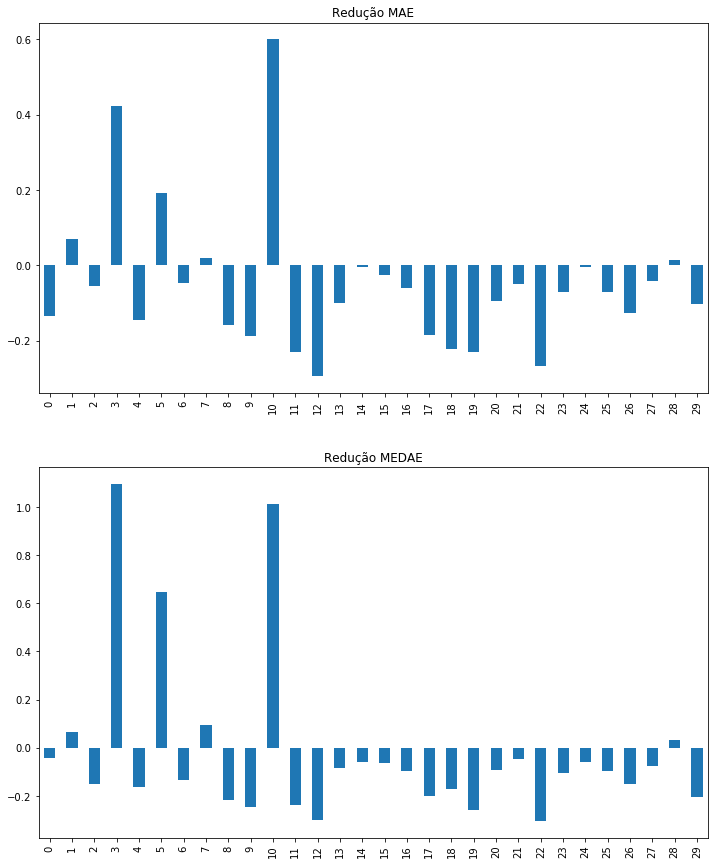

In [54]:
f,a = pylab.subplots(2,1, figsize=(12,15))
#a[0].axhline(y=1, color='k')
df_lift['mae_lift'].plot.bar(ax=a[0], title='Redução MAE')
#a[1].axhline(y=1, color='k')
df_lift['medae_lift'].plot.bar(ax=a[1], title='Redução MEDAE')

Stage 1 - Measurement: 0
Stage 1 - Measurement: 1
Stage 1 - Measurement: 2
Stage 1 - Measurement: 3
Stage 1 - Measurement: 4
Stage 1 - Measurement: 5
Stage 1 - Measurement: 6
Stage 1 - Measurement: 7
Stage 1 - Measurement: 8
Stage 1 - Measurement: 9
Stage 1 - Measurement: 10
Stage 1 - Measurement: 11
Stage 1 - Measurement: 12
Stage 1 - Measurement: 13
Stage 1 - Measurement: 14
Stage 2 - Measurement: 0
Stage 2 - Measurement: 1
Stage 2 - Measurement: 2
Stage 2 - Measurement: 3
Stage 2 - Measurement: 4
Stage 2 - Measurement: 5
Stage 2 - Measurement: 6
Stage 2 - Measurement: 7
Stage 2 - Measurement: 8
Stage 2 - Measurement: 9
Stage 2 - Measurement: 10
Stage 2 - Measurement: 11
Stage 2 - Measurement: 12
Stage 2 - Measurement: 13
Stage 2 - Measurement: 14


# O que a gente faz nesse caso em que não batemos todas as baselines?

# E as features entre o primeiro e segundo estágios?